## Random Forest Classification Implementation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv("Datasets/Travel.csv")

In [4]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
df.shape

(4888, 20)

### Data Cleaning

In [7]:
# Check all the categories
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [8]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [9]:
# Fixing the Gender and Martial Status column

df['Gender'] = df['Gender'].replace("Fe male", "Female")
df['MaritalStatus'] = df['MaritalStatus'].replace("Single", "Unmarried")

In [10]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [11]:
# Checking for missing values
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [12]:
features_with_na = [features for features in df.columns if df[features].isnull().sum() >= 1]
for feature in features_with_na:
    print(f"{feature} = {np.round(df[feature].isnull().mean() * 100, decimals = 3)} %missing values")

Age = 4.624 %missing values
TypeofContact = 0.511 %missing values
DurationOfPitch = 5.135 %missing values
NumberOfFollowups = 0.921 %missing values
PreferredPropertyStar = 0.532 %missing values
NumberOfTrips = 2.864 %missing values
NumberOfChildrenVisiting = 1.35 %missing values
MonthlyIncome = 4.767 %missing values


In [13]:
# Statistics on Numerical Null columns
df[features_with_na].select_dtypes(exclude = 'object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### Imputing Null values

In [15]:
#Age
df.Age.fillna(df.Age.median(), inplace = True)

#TypeofContract
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace = True)

#DurationOfPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace = True)

#NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace = True)

#PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace = True)

#NumberOfTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace = True)

#NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace = True)

#MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace = True)

In [16]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [17]:
# CustomerID is not important, so dropping it
df.drop('CustomerID', inplace = True, axis = 1)

In [18]:
# Adding new feature
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns = ['NumberOfChildrenVisiting', 'NumberOfPersonVisiting'], inplace = True, axis = 1)

In [19]:
# Get all the numeric features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 12


In [20]:
# Get all the categorical features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 6


### Train Test Split And Model Training

In [22]:
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'], axis = 1)
Y = df['ProdTaken']

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [24]:
# Create a Column Transformer with 3 types of transformers
cat_features = X.select_dtypes(include = "object").columns
num_features = X.select_dtypes(exclude = "object").columns

In [25]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [26]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop = 'first')

# Combining multiple transformer techniques
preprocessor = ColumnTransformer(
    [
         ("OneHotEncoder", oh_transformer, cat_features),
          ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [27]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [28]:
# Applying transformation in training dataset
X_train = preprocessor.fit_transform(X_train)

In [29]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.721400,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.653841,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.455047,-0.898180,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,1.545210,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.455047,1.789549,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,-0.252799,0.643615


In [30]:
# Applying transformation in testing dataset
X_test = preprocessor.transform(X_test)

### Random Forest Classifer Training

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [33]:
models = {
    "Logisitic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boost": GradientBoostingClassifier()
}

In [34]:
# Training the model
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train)

    # Make predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(Y_train, Y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(Y_train, Y_train_pred, average = 'weighted') # Calculate F1-score
    model_train_precision = precision_score(Y_train, Y_train_pred) # Calculate Precision
    model_train_recall = recall_score(Y_train, Y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(Y_train, Y_train_pred) # Calculate Roc

    # Test set performance
    model_test_accuracy = accuracy_score(Y_test, Y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(Y_test, Y_test_pred, average = 'weighted') # Calculate F1-score
    model_test_precision = precision_score(Y_test, Y_test_pred) # Calculate Precision
    model_test_recall = recall_score(Y_test, Y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(Y_test, Y_test_pred) #Calculate Roc

    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
 
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('=' * 35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.8473
- F1 score: 0.8225
- Precision: 0.7037
- Recall: 0.3128
- Roc Auc Score: 0.6413
----------------------------------
Model performance for Test set
- Accuracy: 0.8384
- F1 score: 0.8118
- Precision: 0.6988
- Recall: 0.3037
- Roc Auc Score: 0.6359


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9213
- F1 score: 0.9202
- Precision: 0.8202
- Recall: 0.7644
- Roc Auc Score: 0.8619


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9305
- F1 score: 0.9251
- Precision: 0.9767
- Recall: 0.6597
- Roc Auc Score: 0.8279


Gradient Boost
Model performance for Training se

### HyperParameter Tuning

In [65]:
# HyperParameter Tuning -> Finding the best parameters
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [67]:
# Model list for HyperParameter Tuning
randomcv_models = [("RF", RandomForestClassifier(), rf_params)]

In [69]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [77]:
from sklearn.model_selection import RandomizedSearchCV

model_parameters = {}

for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator = model, param_distributions = params, n_iter = 100, cv = 3, verbose = 2, n_jobs = -1)
    
    random.fit(X_train, Y_train)
    model_parameters[name] = random.best_params_

for model_name in model_parameters:
    print(f"Best Params for {model_name} are: ")
    print(model_parameters[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Params for RF are: 
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [79]:
# Training again with HyperParameters (Best Samples)
models = {"Random Forest": RandomForestClassifier(n_estimators = 500, min_samples_split = 2, max_features = 8, max_depth = None)}

#Training the model
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train) 
    
    # Making predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(Y_train, Y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(Y_train, Y_train_pred, average = 'weighted') # Calculate F1-score
    model_train_precision = precision_score(Y_train, Y_train_pred) # Calculate Precision
    model_train_recall = recall_score(Y_train, Y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(Y_train, Y_train_pred) # Calculate Roc

    # Test set performance
    model_test_accuracy = accuracy_score(Y_test, Y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(Y_test, Y_test_pred, average = 'weighted') # Calculate F1-score
    model_test_precision = precision_score(Y_test, Y_test_pred) # Calculate Precision
    model_test_recall = recall_score(Y_test, Y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(Y_test, Y_test_pred) #Calculate Roc

In [83]:
print(list(models.keys())[i])
    
print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:.4f}'.format(model_train_f1))

print('- Precision: {:.4f}'.format(model_train_precision))
print('- Recall: {:.4f}'.format(model_train_recall))
print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

print('----------------------------------')

print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


print('=' * 35)
print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9356
- F1 score: 0.9313
- Precision: 0.9706
- Recall: 0.6911
- Roc Auc Score: 0.8430




### Plotting ROC AUC Curve

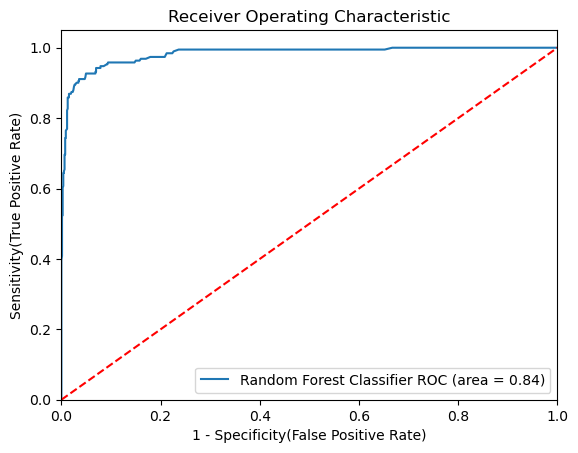

In [87]:
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators = 500, min_samples_split = 2, max_features = 8, max_depth = None),
    'auc':  0.8430
},]

# Create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, Y_train) # train the model
    
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1])

# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label = '%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.savefig("Area Under Curve (AUC).png")
plt.show() 